## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read csv to dataframe using pandas
df = pd.read_csv('ab_data.csv')
# Showing top 5 rows using head()
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Finding number of rows using shape()
print("The dataframe has {} rows".format(df.shape[0]))

The dataframe has 294478 rows


c. The number of unique users in the dataset.

In [4]:
# Using nunique() to find number of unique values in user_id column
print("The dataframe has {} unique users(user_id)".format(df['user_id'].nunique()))

The dataframe has 290584 unique users(user_id)


d. The proportion of users converted.

In [5]:
# Calculate proportion of users converted but first, check if all converted users are unique
df[df['converted'] == 1].shape[0] == df[df['converted'] == 1]['user_id'].nunique()

False

In [6]:
# We have users that were converted more than 1 time so we need to filter those out of the calculation
# We divide total unique users by number of unique converted
converted = df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique()
print("{:.0%} of unique users were converted".format(converted))

12% of unique users were converted


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# Showing the number of records where new_page and treatment are not present
not_match = df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')].shape[0] + df[(df['landing_page'] != 'new_page') & (df['group'] == 'treatment')].shape[0]
print("{} records don't have the new_page and treatment combination".format(not_match))

3893 records don't have the new_page and treatment combination


f. Do any of the rows have missing values?

In [8]:
# Find if any of the columns have missing values
print("Number of missing values by colum")
np.sum(df.isnull())

Number of missing values by colum


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Apply filter and save to new dataframe
df2 = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page'))|((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
# Confirm values included
df2.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Using nunique() to find number of unique values in user_id column
print("The dataframe has {} unique users(user_id)".format(df2['user_id'].nunique()))

The dataframe has 290584 unique users(user_id)


b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [12]:
# Find duplicated user_id in df2
df2[df2['user_id'].duplicated(keep=False) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Keeping the first duplicate value
df2 = df2.drop(index = 2893)
# Confirming there are no more duplicates
df2[df2['user_id'].duplicated(keep=False) == True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Reuse same code from df1 to show probability
converted_df2 = df2[df2['converted'] == 1]['user_id'].nunique() / df2['user_id'].nunique()
print("{:.4} is the probablity of conversion for all unique users".format(converted_df2))

0.1196 is the probablity of conversion for all unique users


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Apply control filter
converted_df2_control = (df2[(df2['converted'] == 1) & (df2['group'] == 'control')]['user_id'].nunique() / 
                        df2[df2['group'] == 'control']['user_id'].nunique())
print("{:.4} is the probablity of conversion for all unique control users".format(converted_df2_control))

0.1204 is the probablity of conversion for all unique control users


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Apply treatment filter
converted_df2_treatment = (df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')]['user_id'].nunique() / 
                        df2[df2['group'] == 'treatment']['user_id'].nunique())
print("{:.4} is the probablity of conversion for all unique treatment users".format(converted_df2_treatment))

0.1188 is the probablity of conversion for all unique treatment users


d. What is the probability that an individual received the new page?

In [17]:
# Show probability of receiving new page
received_new_page = df2[df2['landing_page'] == 'new_page']['user_id'].nunique() / df2['user_id'].nunique()
print("{:.4} is the probablity of receiving the new page".format(received_new_page))

0.5001 is the probablity of receiving the new page


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**I dont think there is enough evidence since the probabilities of conversion are not that different and that it was not by chance**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

##### **$H_{0}$** : **$p_{new}$** - **$p_{old}$** <= 0  
##### **$H_{1}$** : **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# No need to calculate, I will use the variable converted_df2 which applies regardless of the page in df2
print("{:.4} is the conversion rate regardless of the page".format(converted_df2))

0.1196 is the conversion rate regardless of the page


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# No need to calculate, I will use the variable converted_df2 which applies regardless of the page in df2
print("{:.4} is the conversion rate regardless of the page".format(converted_df2))

0.1196 is the conversion rate regardless of the page


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# Store and print number of individuals in treatment group
num_treatment = df2[df2['group'] == 'treatment']['user_id'].nunique()
print("{} inviduals in the treatment group".format(num_treatment))

145310 inviduals in the treatment group


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# Store and print number of individuals in treatment group
num_control = df2[df2['group'] == 'control']['user_id'].nunique()
print("{} inviduals in the control group".format(num_control))

145274 inviduals in the control group


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Use np.random.choice to simulate transactions using the number of treatment individuals and 
# the converted rate under the null (.1196)
new_page_converted = np.random.choice([0,1],num_treatment,p=[1-converted_df2,converted_df2])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Use np.random.choice to simulate transactions using the number of control individuals and 
# the converted rate under the null (.1196)
old_page_converted = np.random.choice([0,1],num_control,p=[1-converted_df2,converted_df2])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Get difference in converted rates using simulated values
new_page_converted.mean() - old_page_converted.mean()

-0.00045628096889648029

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# Create list to store diffs
p_diffs = []

# Creating 10000 values for the difference between converted rates
new_page_converted = np.random.binomial(num_treatment, converted_df2, 10000)/num_treatment
old_page_converted = np.random.binomial(num_control, converted_df2, 10000)/num_control
p_diffs = new_page_converted - old_page_converted 

In [26]:
# Converting list to array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

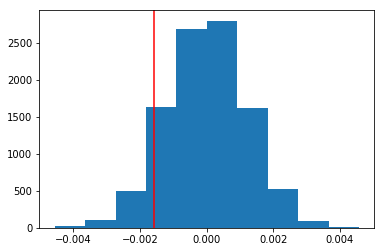

In [27]:
# Plotting histogram
plt.hist(p_diffs);
# Getting actual difference in proportions from ab_data.csv (df2)
orig_diffs = converted_df2_treatment - converted_df2_control
# Adding reference to difference present in df2
plt.axvline(x = orig_diffs, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Getting proportion of higher p_diffs
(p_diffs > orig_diffs).mean()

0.91039999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I have computed the p-value and since it is very close to 1 it means that we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

# Adding number of converted for new and old website
convert_old = np.sum(df2[df2['landing_page'] == 'old_page']['converted'])
convert_new = np.sum(df2[df2['landing_page'] == 'new_page']['converted'])
n_old = 145274
n_new = 145310

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
# Using the built in to compute the z-score and p-value for the old and new website
stat, pval = sm.stats.proportions_ztest(count=(convert_new, convert_old),nobs=(n_new, n_old),value=0, alternative='larger')
(stat,pval)

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score -1.31 is very far from the average and the p-value of .90, also very far from the error rate (.05) mean that we fail to reject the null hypothesis just like in the parts j and k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regresion**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Create dummies for landing page and group
df2[['np','op']] = pd.get_dummies(df2['landing_page'])
df2[['dummy','ab_page']] = pd.get_dummies(df2['group'])
# Drop dummy column from group value
df2 = df2.drop(['np','dummy'], axis=1)
# Confirm columns available
df2.head()

,user_id,timestamp,group,landing_page,converted,op,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
# Add intercept
df2['intercept'] = 1
# Create regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
# Fit model with extra iterations to avoid warnings
results = log_mod.fit(maxiter=60)

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Using fix to avoid missing attribute "chisqprob" (https://github.com/statsmodels/statsmodels/issues/3931)
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# Show summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:50:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [34]:
# exponentiate coef for ab_page
np.exp(-0.6729)

0.51022677256702809

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p value for ab_page is 0.190, this means that it's not significant enough to reject the null hypothesis. The null in the regression is the intercept and the alternative is the ab_page value while the null in Part II is that the conversion rate of the new page is lower or equal to the rate of the old one and the alternative is that the new page has a higher conversion rate than the old one. Basically Part III is a two tailed test while Part II is a one tailed test**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Its a good idea since there might be additional factors that influence the conversion rate of each user that we are not aware of, such as the session duration on the website, user age, etc.The disadvantage is that you might get contradicting results that might delay taking a decision about a change on the website**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
# Read countries csv into dataframe
df_countries = pd.read_csv('countries.csv')
# Join with df2
df2 = df2.join(df_countries.set_index('user_id'),on='user_id')
# Create dummies for countries
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])
# Drop one of the dummies
df2 = df2.drop(['CA'], axis=1)

In [36]:
# Add intercept
df2['intercept'] = 1
# Create regression model for countries
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'UK','US']])
# Fit model
results = log_mod.fit()
# Show summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        03:50:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [37]:
# exponentiate coef for UK and US
np.exp(0.0507),np.exp(.0408)

(1.0520072437650141, 1.0416437559600236)

**Countries does not seem to have and impact on the converted rates since the proportion of convertion is almost 1 times as likely**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
# Create new column with interaction
df2['page_country'] = df2['ab_page'] * df2['UK']
# Add intercept
df2['intercept'] = 1
# Create regression model for page_country
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','UK', 'page_country']])
# Fit model
results = log_mod.fit()
# Show summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               2.036e-05
Time:                        03:51:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9876      0.009   -213.551      0.000      -2.006      -1.969
ab_page         -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK              -0.0046      0.019     -0.247      0.805      -0.041       0.032
page_country     0.0345      0.026      1.307      0.191      -0.017       0.086
================================================================================
"""

In [39]:
# exponentiate coef for page_country
np.exp(0.0345)

1.0351020283761143

**OVERALL CONCLUSION:** We fail to reject the null based on the different tests we performed, this means that we suggest not to change the website.

**Same as before the proportion is close to 1 so it does not impact the conversion rate**

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0